In [7]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.preprocessing import StandardScalar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


In [9]:
#Importing additional libraries
import datetime
#from scipy.stats import pearsonr

In [10]:
# Access and Reading the data
bb_model = pd.read_csv('day.csv')

In [11]:
bb_model.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
bb_model.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
bb_model.shape

(730, 16)

In [14]:
bb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [15]:
# Checking the data
bb_model.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
# Checking the columns  

bb_model.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
bb_model.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [18]:
bb_model.size

11680

In [19]:
# Cleaning the data, droping the unwanted the columns

bb_model.drop(['dteday', 'casual', 'instant', 'registered'], axis = 1, inplace = True)


In [20]:
bb_model.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Missing values check

bb_model.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [22]:
bb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [23]:
#bb_model.season.value_counts()

In [24]:
#bb_model.weathersit.value_counts()

In [25]:
bb_model.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [26]:
bb_model.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [27]:
bb_model.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<Figure size 1296x1440 with 0 Axes>

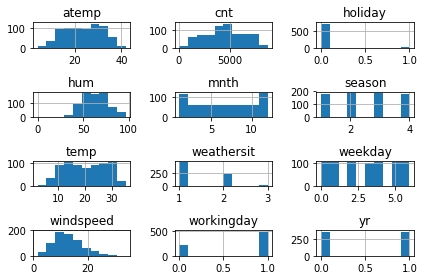

In [28]:
# Visualization of our data

plt.figure(figsize=(18, 20))
bb_model.hist(rwidth = 1.0)
plt.tight_layout()
plt.show()

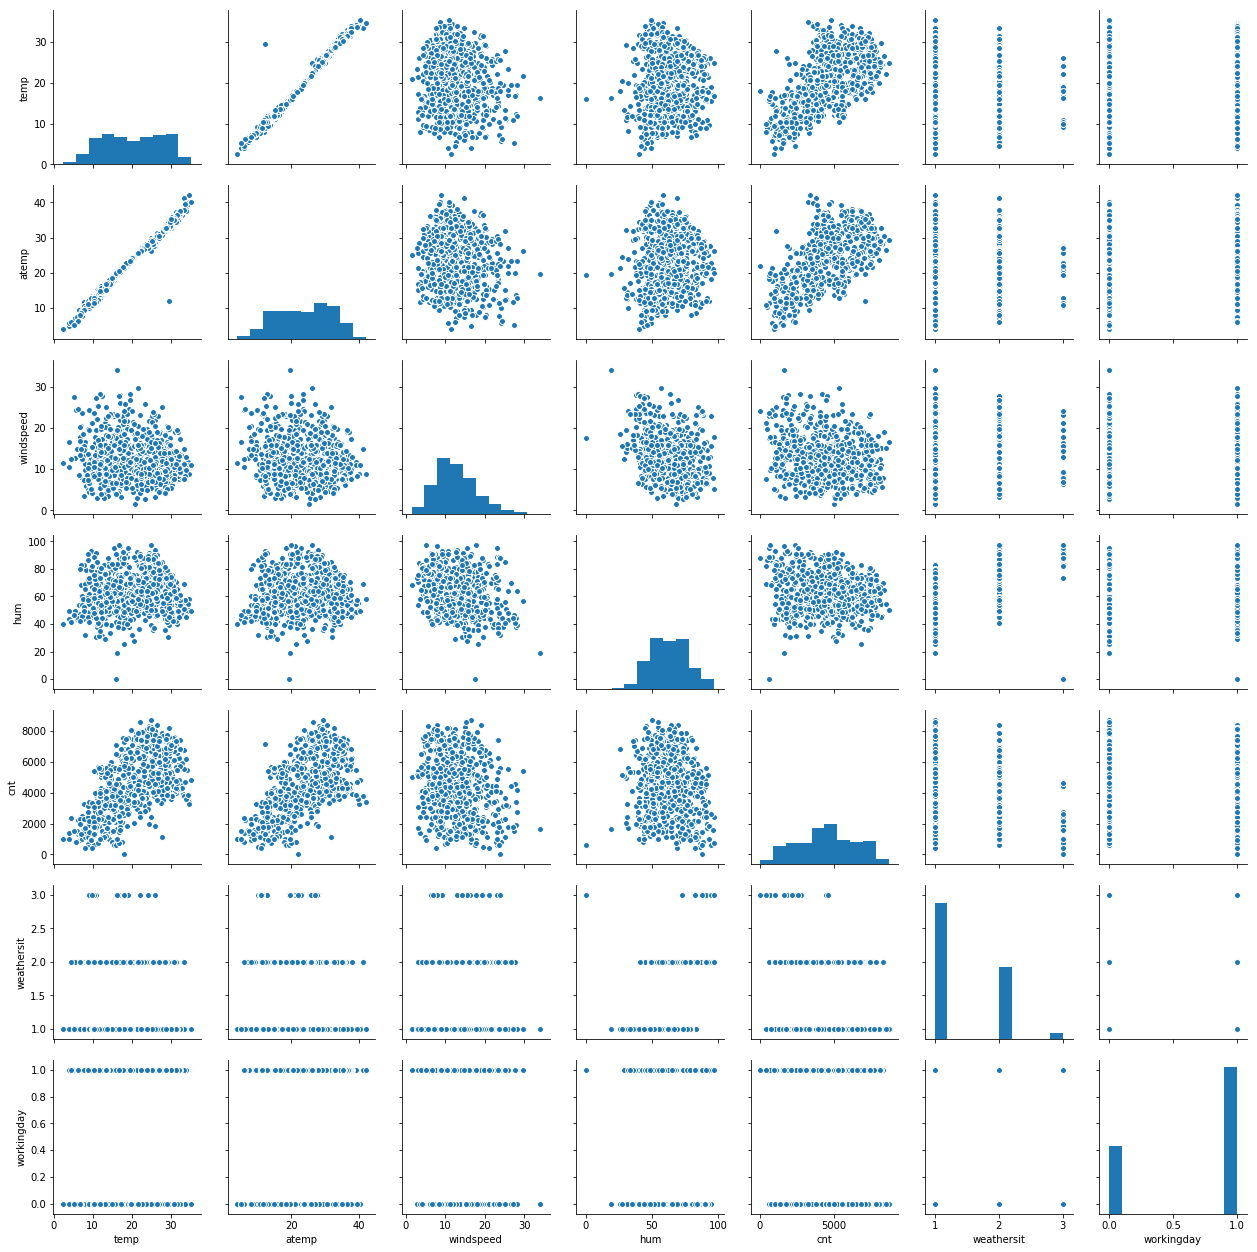

In [29]:
bikes = bb_model[['temp', 'atemp', 'windspeed', 'hum', 'cnt', 'weathersit', 'workingday']]
sns.pairplot(bikes)

--> From the above observation we can see the similar relation between temp, atemp and cnt
    Variable.

<Figure size 1440x1080 with 0 Axes>

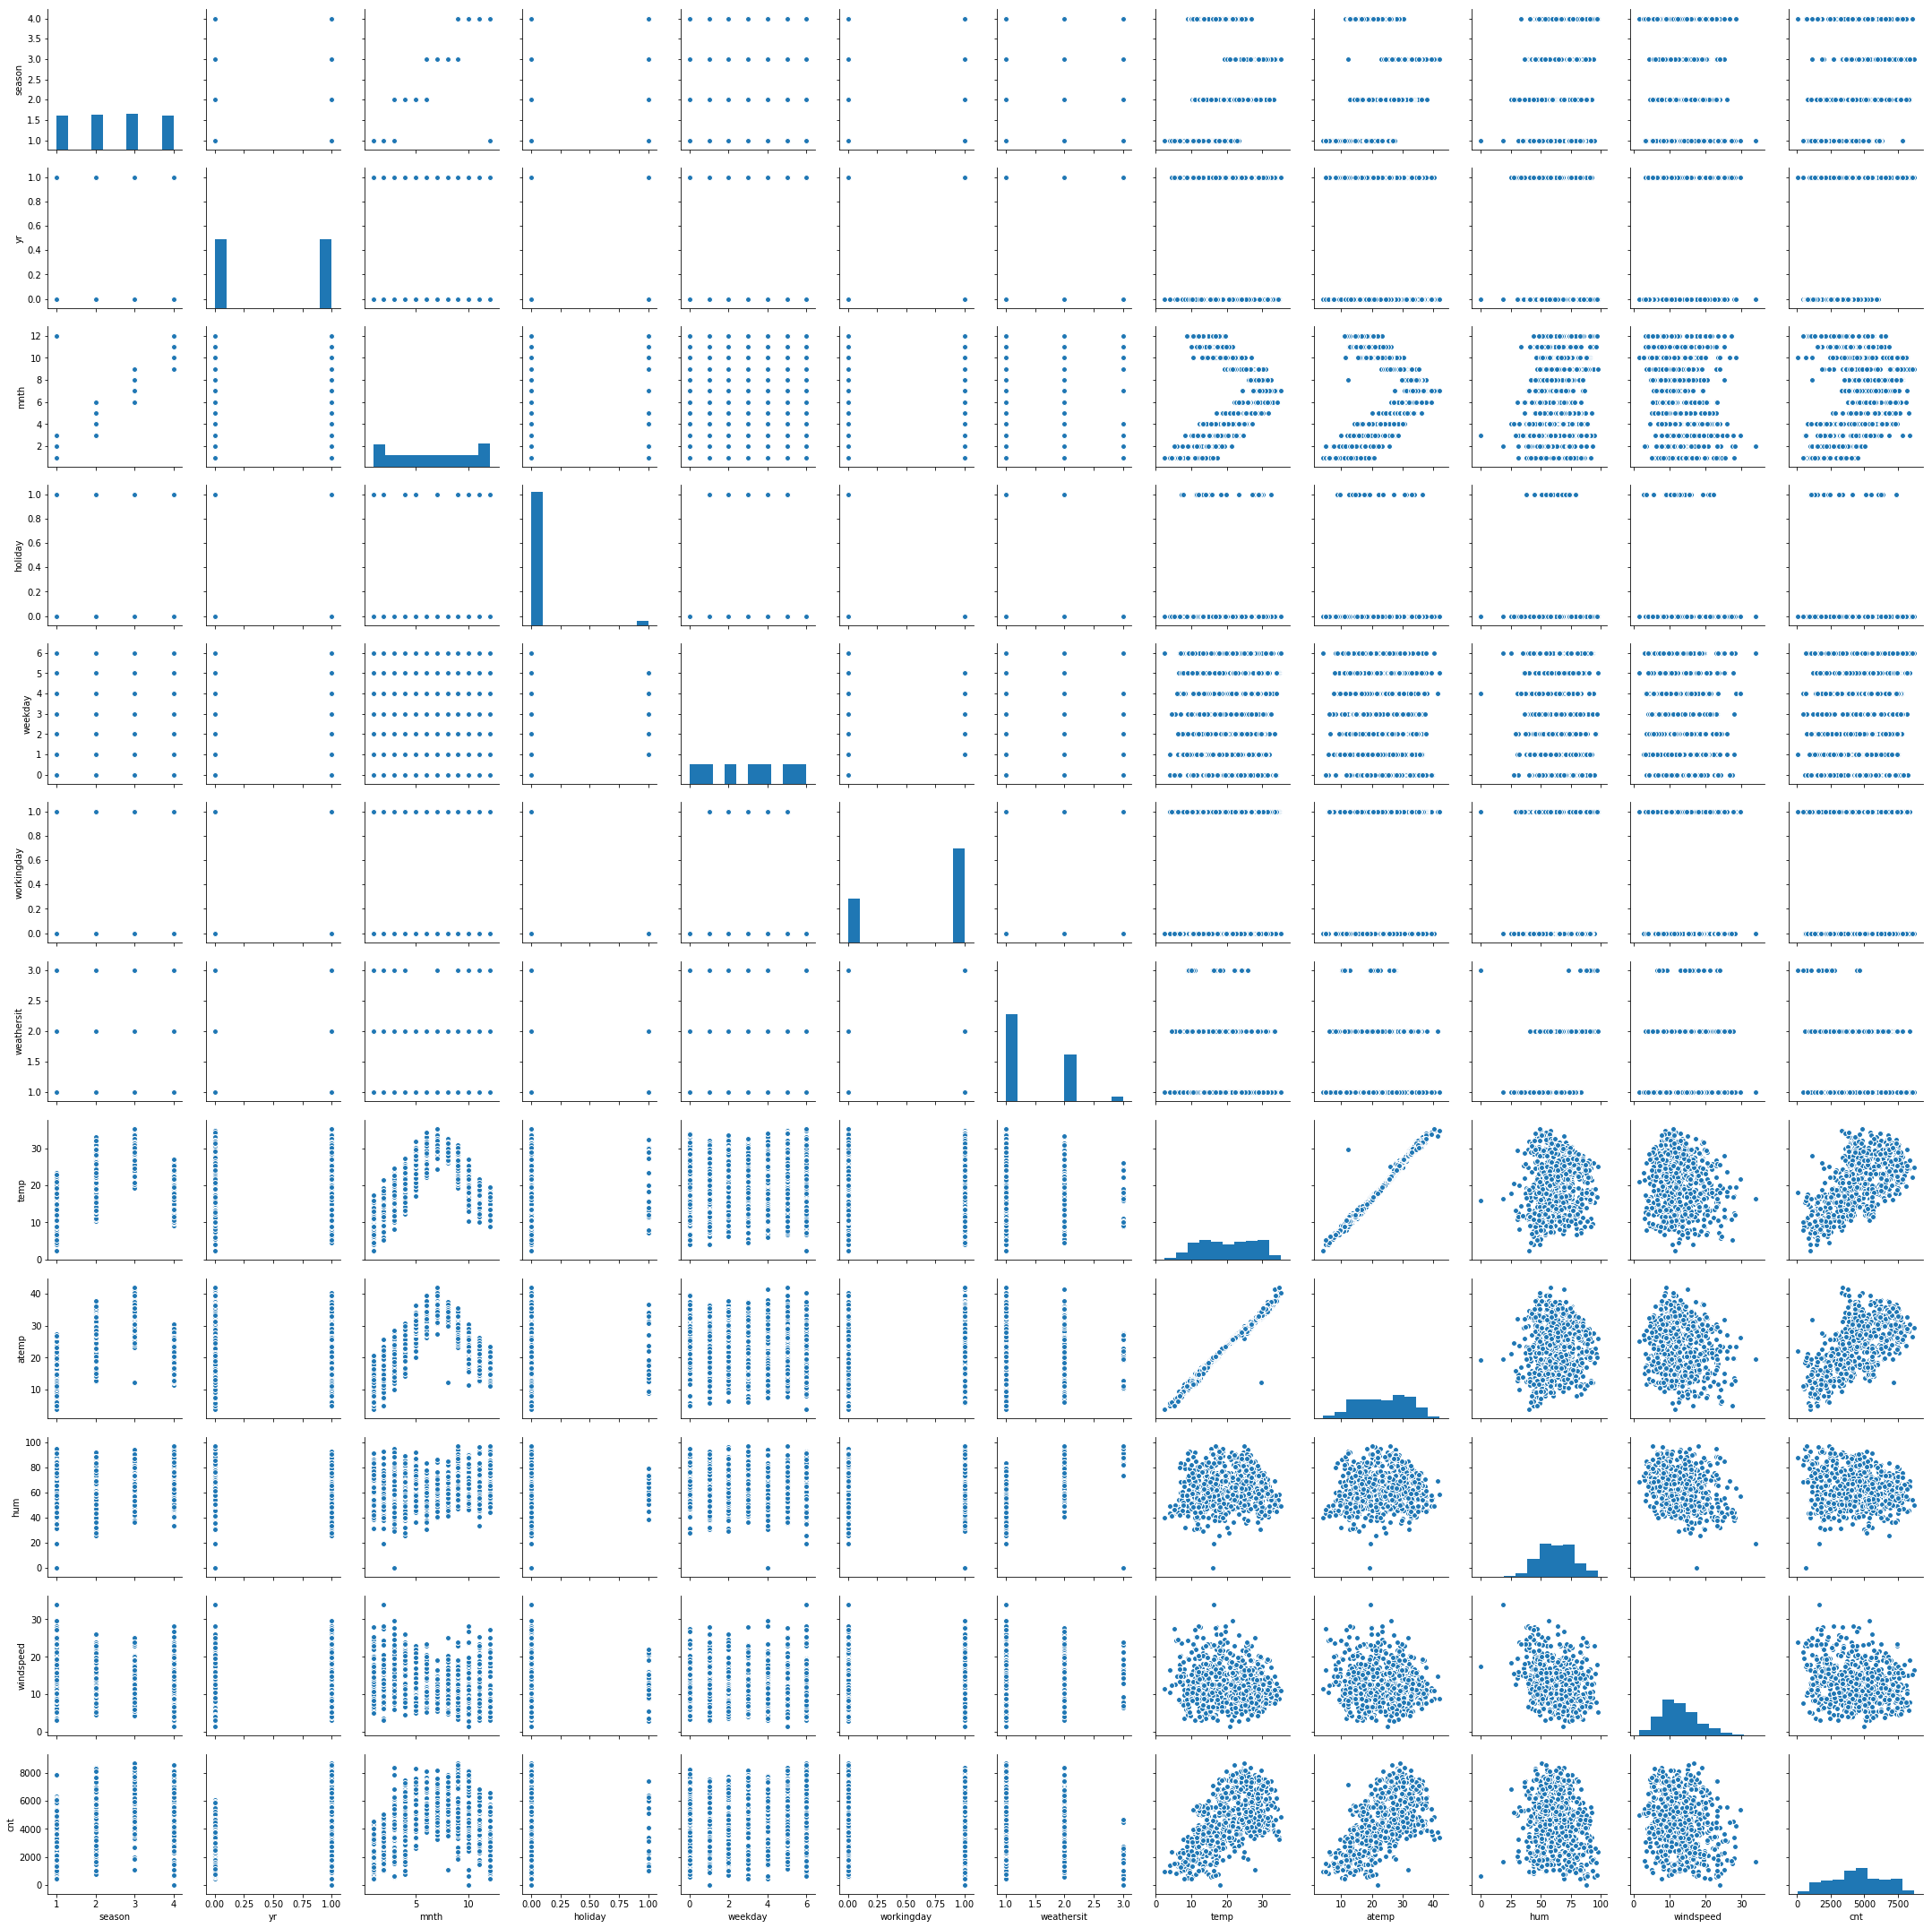

In [30]:
#categorical = ['season', 'yr', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize = (20, 15))
sns.pairplot(bb_model)
plt.show()

--> Data Visulization fot the correlation between the variables.

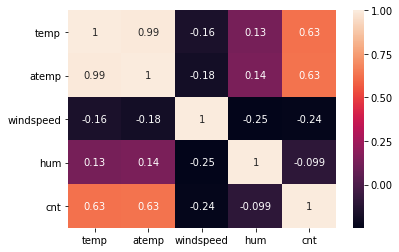

In [31]:

#sns.heatmap(bb_model[['temp', 'atemp', 'windspeed', 'hum', 'cnt']].corr(), cmap='BuGn' annot = True)
bikes = bb_model[['temp', 'atemp', 'windspeed', 'hum', 'cnt']]
sns.heatmap(bikes.corr(), annot = True)
plt.show()

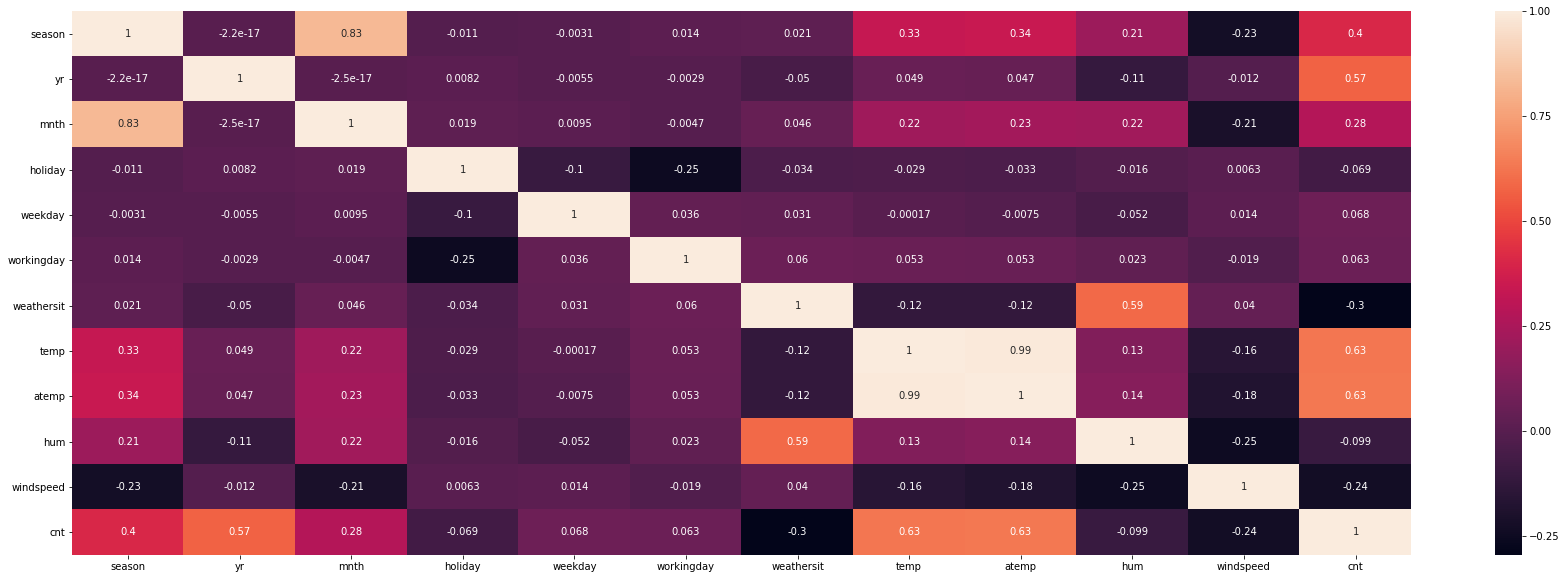

In [32]:
# Finding the correlation for numerical variables
relation = bb_model.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(relation, annot = True)
plt.show()

--> From the above observation temp, atemp are highly correlated, and nedd to considered for the linear 
regression model.

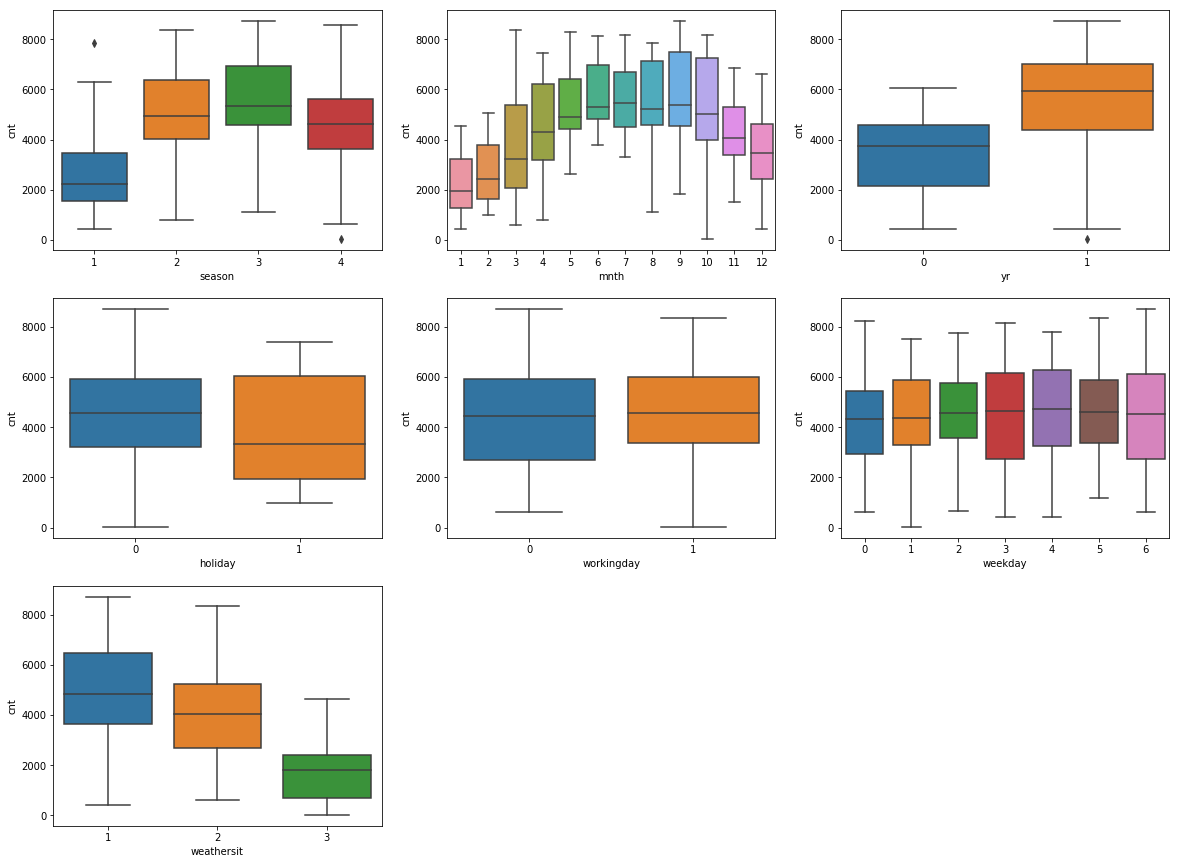

In [33]:
# Categorical variables

bikes = bb_model[['season', 'mnth', 'yr', 'holiday', 'workingday', 'weekday', 'weathersit']]
plt.figure(figsize=(20, 15))
for i in enumerate(bikes):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=bb_model, x=i[1], y='cnt')
    
plt.show()

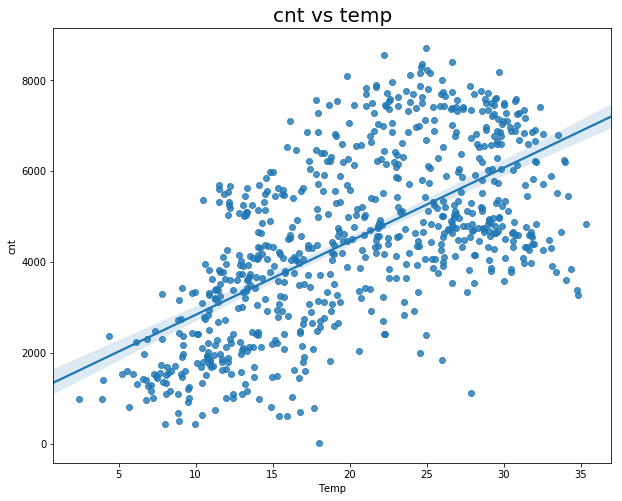

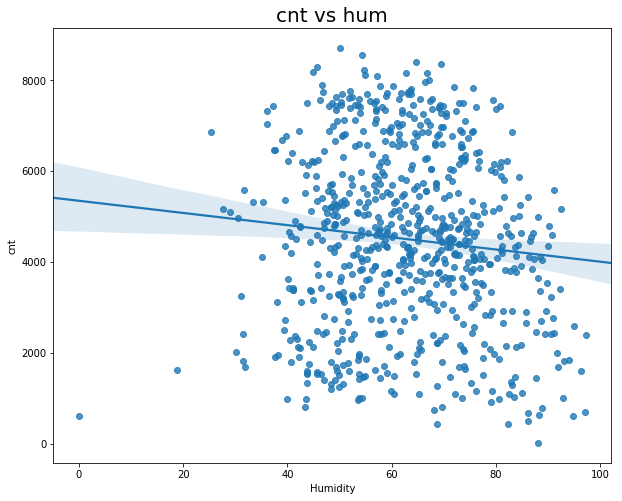

In [34]:
plt.figure(figsize=(10, 8))
plt.title('cnt vs temp', fontsize = 20)
sns.regplot(data = bb_model, x = 'temp', y = 'cnt')
plt.xlabel('Temp')
plt.show()
plt.figure(figsize=(10, 8))
plt.title('cnt vs hum', fontsize = 20)
sns.regplot(data = bb_model, x = 'hum', y = 'cnt')
plt.xlabel('Humidity')
plt.show()

Observations:

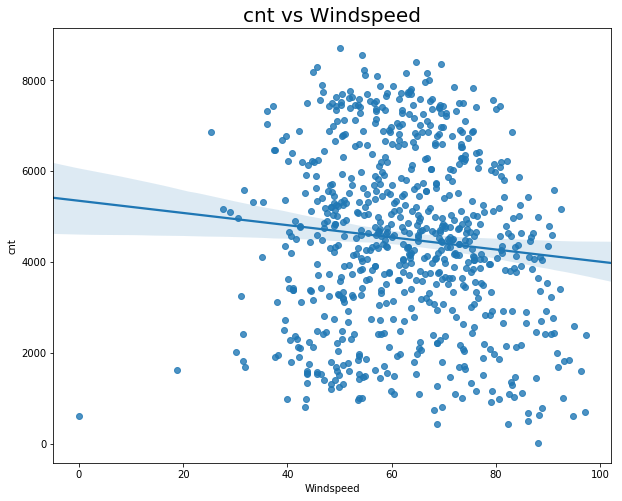

In [35]:
plt.figure(figsize=(10, 8))
plt.title('cnt vs Windspeed', fontsize = 20)
sns.regplot(data = bb_model, x = 'hum', y = 'cnt')
plt.xlabel('Windspeed')
plt.show()

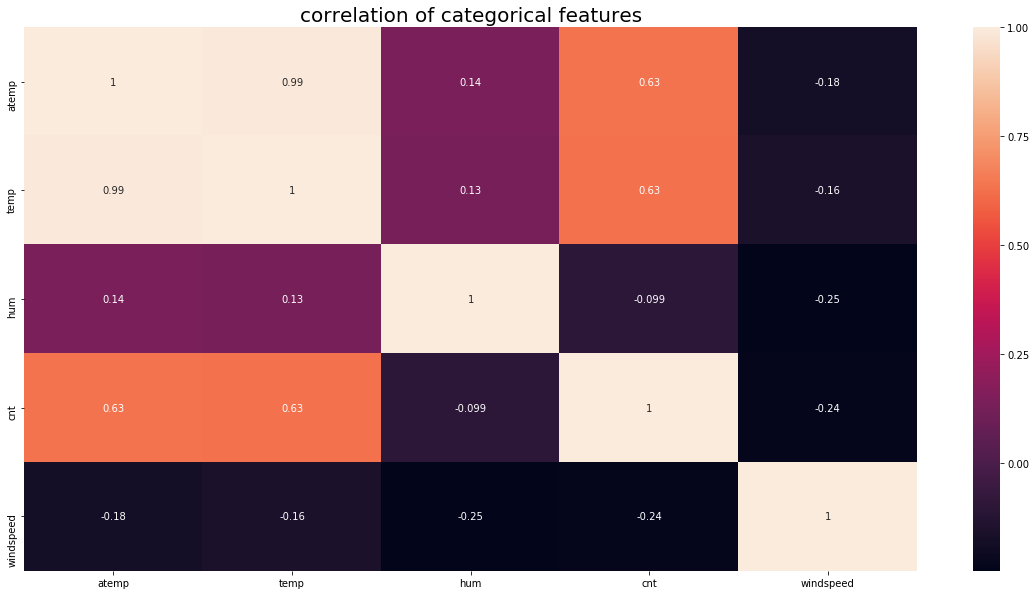

In [36]:
categorical_features = ['atemp', 'temp', 'hum', 'cnt', 'windspeed']
plt.figure(figsize=(20, 10))
plt.title('correlation of categorical features', fontsize = 20)
sns.heatmap(bb_model[categorical_features].corr(), annot = True)
plt.show()

In [37]:
bb_model.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [40]:
bb_model.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [41]:
bb_model = pd.get_dummies(data=bb_model, columns=["mnth", "season", "weekday"], drop_first = True)
bb_model = pd.get_dummies(data=bb_model,columns=["weathersit"])


In [42]:
bb_model.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [43]:
bb_model.shape

(730, 31)

In [44]:
bb_model.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,1,0,0,0,1,0,0


In [55]:
# Train and test the data
y = bb_model.pop('cnt')
X = bb_model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

In [58]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [60]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(219, 30)


In [61]:
bb_model.shape

(730, 30)

In [64]:
#Re-scaling the features
#from sklearn.preprocessing import MinMaxScaler
variables = ['temp', 'atemp', 'hum', 'windspeed']
scaler = MinMaxScaler()
#X.train.head()
X_train[variables] = scaler.fit_transform(X_train[variables])

In [69]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,1,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [71]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.066667,0.098039,0.078431,...,0.24902,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.249689,0.297660,0.269113,...,0.43287,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# Building a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
# Removing the 15 features
rfe = RFE(lin_reg, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [75]:
list(zip(X_train.columns, rfe.ranking_, rfe.support_))

[('yr', 1, True),
 ('holiday', 1, True),
 ('workingday', 1, True),
 ('temp', 1, True),
 ('atemp', 7, False),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('mnth_2', 8, False),
 ('mnth_3', 3, False),
 ('mnth_4', 5, False),
 ('mnth_5', 4, False),
 ('mnth_6', 6, False),
 ('mnth_7', 11, False),
 ('mnth_8', 1, True),
 ('mnth_9', 1, True),
 ('mnth_10', 1, True),
 ('mnth_11', 12, False),
 ('mnth_12', 13, False),
 ('season_2', 1, True),
 ('season_3', 2, False),
 ('season_4', 1, True),
 ('weekday_1', 9, False),
 ('weekday_2', 10, False),
 ('weekday_3', 15, False),
 ('weekday_4', 16, False),
 ('weekday_5', 14, False),
 ('weekday_6', 1, True),
 ('weathersit_1', 1, True),
 ('weathersit_2', 1, True),
 ('weathersit_3', 1, True)]

In [76]:
# Adding the 15 columns using rfe and removing the unwanted columns from the dataset

clmn = X_train.columns[rfe.support_]
clmn

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_8',
       'mnth_9', 'mnth_10', 'season_2', 'season_4', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'season_3', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [78]:
X_train = X_train[clmn]
X_train

,yr,holiday,workingday,temp,hum,windspeed,mnth_8,mnth_9,mnth_10,season_2,season_4,weekday_6,weathersit_1,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,1,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,1,0,0,0,1,0
580,1,0,0,0.914852,0.632030,0.462538,1,0,0,0,0,1,1,0,0
500,1,0,1,0.719639,0.719193,0.172431,0,0,0,1,0,0,1,0,0
479,1,0,1,0.520271,0.440962,0.164434,0,0,0,1,0,0,1,0,0
472,1,0,1,0.503656,0.586518,0.270032,0,0,0,1,0,0,0,1,0


In [83]:
# By using statmodel api building a model    
X_train_lin_reg = sm.add_constant(X_train)
lin_reg_1 = sm.OLS(y_train, X_train_lin_reg).fit()
lin_reg_1.summary()
#print(lin_reg_1.summary())
#return lin_reg_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.24e-192
Time:                        23:37:45   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     495   BIC:                             8307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          617.9842    220.253      2.806      0.005     185.238    1050.731
yr            1991.8003     69.298     28.743      0.000    1855.646    2127.955
holiday       -485.4328    233.580     -2.078      0.038    -944.363     -26.503
workingday     385.5343    100.135      3.850      0.000     188.791     582.277
temp          4607.3314    190.890     24.136      0.000    4232.277    4982.386
hum          -1470.7936    321.111     -4.580      0.000   -2101.702    -839.885
windspeed    -1614.1898    219.362     -7.359      0.000   -2045.185   -1183.194
mnth_8         486.5873    139.913      3.478      0.001     211.691     761.484
mnth_9        1090.4246    140.103      7.783      0.000     815.155    1365.694
mnth_10        357.1657    148.641      2.403      0.017      65.121     649.210
season_2       903.3425     93.319      9.680      0.000     719.992    1086.693
season_4      1171.8277    103.558     11.316      0.000     968.360    1375.295
weekday_6      459.9928    126.138      3.647      0.000     212.160     707.826
weathersit_1  1094.9610     73.882     14.820      0.000     949.801    1240.121
weathersit_2   588.8551     99.343      5.927      0.000     393.669     784.041
weathersit_3 -1065.8319    189.556     -5.623      0.000   -1438.266    -693.398
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                     2.10e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
#Checking the VIF values of the variables
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,weathersit_1,33.55
13,weathersit_2,25.02
14,weathersit_3,3.69
2,workingday,1.88
4,hum,1.88
11,weekday_6,1.79
10,season_4,1.72
3,temp,1.59
8,mnth_10,1.49
6,mnth_8,1.46


In [116]:
# dropping the weathersit 
X_nm = X_train.drop('weathersit_1', 1)
X_train_lin_reg = sm.add_constant(X_nm)
lin_reg_2 = sm.OLS(y_train, X_train_lin_reg).fit()
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.24e-192
Time:                        00:38:36   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     495   BIC:                             8307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1712.9452    249.777      6.858      0.000    1222.192    2203.698
yr            1991.8003     69.298     28.743      0.000    1855.646    2127.955
holiday       -485.4328    233.580     -2.078      0.038    -944.363     -26.503
workingday     385.5343    100.135      3.850      0.000     188.791     582.277
temp          4607.3314    190.890     24.136      0.000    4232.277    4982.386
hum          -1470.7936    321.111     -4.580      0.000   -2101.702    -839.885
windspeed    -1614.1898    219.362     -7.359      0.000   -2045.185   -1183.194
mnth_8         486.5873    139.913      3.478      0.001     211.691     761.484
mnth_9        1090.4246    140.103      7.783      0.000     815.155    1365.694
mnth_10        357.1657    148.641      2.403      0.017      65.121     649.210
season_2       903.3425     93.319      9.680      0.000     719.992    1086.693
season_4      1171.8277    103.558     11.316      0.000     968.360    1375.295
weekday_6      459.9928    126.138      3.647      0.000     212.160     707.826
weathersit_2  -506.1060     90.083     -5.618      0.000    -683.098    -329.114
weathersit_3 -2160.7930    226.056     -9.559      0.000   -2604.940   -1716.646
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# checking VIF after dropping weatherset_1

vif=pd.DataFrame()
vif['Features'] = X_nm.columns
vif['VIF'] = [variance_inflation_factor(X_nm.values, i) for i in range(X_nm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.08
0,yr,1.95
7,season_4,1.93
6,season_2,1.79
5,mnth_10,1.60
3,mnth_8,1.57
9,weathersit_2,1.44
4,mnth_9,1.32
8,weekday_6,1.16
10,weathersit_3,1.07


In [148]:
# dropping the season_4 and building the model 
X_nm = X_nm.drop('season_4', 1)
X_train_lin_reg = sm.add_constant(X_nm)
lin_reg_3 = sm.OLS(y_train, X_train_lin_reg).fit()
lin_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.10e-158
Time:                        01:37:16   Log-Likelihood:                -4198.2
No. Observations:                 510   AIC:                             8418.
Df Residuals:                     499   BIC:                             8465.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1093.5265    125.651      8.703      0.000     846.656    1340.397
yr            2029.3576     82.113     24.714      0.000    1868.028    2190.687
holiday       -763.3876    260.919     -2.926      0.004   -1276.023    -250.753
temp          4328.5269    217.412     19.909      0.000    3901.371    4755.683
mnth_8         293.5380    164.777      1.781      0.075     -30.203     617.279
mnth_9        1096.4612    165.865      6.611      0.000     770.581    1422.341
mnth_10       1110.4450    153.467      7.236      0.000     808.924    1411.966
season_2       541.1230    106.340      5.089      0.000     332.193     750.053
weekday_6      145.5992    113.038      1.288      0.198     -76.491     367.689
weathersit_2  -687.1583     87.910     -7.817      0.000    -859.877    -514.440
weathersit_3 -2562.9258    247.360    -10.361      0.000   -3048.921   -2076.931
==============================================================================
Omnibus:                       35.609   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.566
Skew:                          -0.523   Prob(JB):                     3.85e-12
Kurtosis:                       4.174   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# checking VIF after dropping hum

vif=pd.DataFrame()
vif['Features'] = X_nm.columns
vif['VIF'] = [variance_inflation_factor(X_nm.values, i) for i in range(X_nm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.89
0,yr,1.92
6,season_2,1.67
3,mnth_8,1.49
8,weathersit_2,1.41
4,mnth_9,1.31
5,mnth_10,1.22
7,weekday_6,1.15
9,weathersit_3,1.07
1,holiday,1.03


In [197]:
# To work on prediction model trained data
y_train_prediction = lin_reg_3.predict(X_train_lin_reg)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tught_layout'

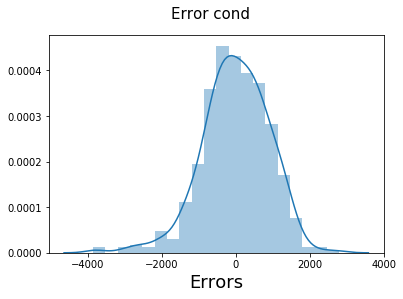

In [198]:
fig = plt.figure()
sns.distplot((y_train - y_train_prediction), bins = 20)
fig.suptitle('Error cond', fontsize = 15)
plt.xlabel('Errors', fontsize = 18)
plt.tught_layout()
plt.show()
#plot_res((y_train - y_train_prediction), bins = 20)


In [158]:
#def plot_res(act, predict):
#    sns.distplot(act-predict)
#    plt.title("Error Terms")    plt.xlabel('Errors')#

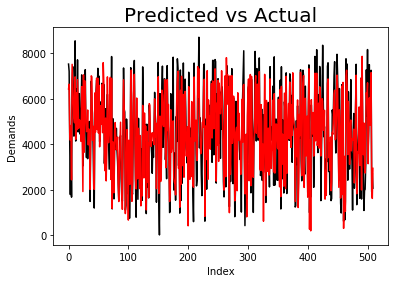

In [164]:
#Errors are disturbuted by mean factor

z = [i for i in range(0, len(X_train), 1)]
plt.plot(z, y_train, color = "black")
plt.plot(z, y_train_prediction, color = "red")
plt.title('Predicted vs Actual', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

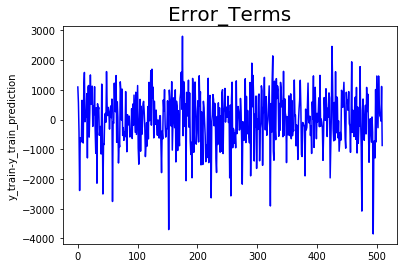

In [169]:
z = [i for i in range(0, len(X_train), 1)]
plt.plot(z, y_train-y_train_prediction, color = 'blue')
#plt.plot(z, y_train_prediction, color = "red")
plt.title('Error_Terms', fontsize = 20)
plt.ylabel('y_train-y_train_prediction')
#plt.xlabel('Index')
plt.show()

In [170]:
# Most of the error terms are independent
# checking the R_squared value

r2_score(y_train, y_train_prediction)

0.7825126225920156

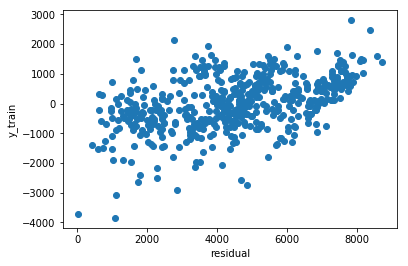

In [173]:
# plot for check and testing the dataset with prediction_values
a = (y_train - y_train_prediction)
plt.scatter(y_train, a)
plt.xlabel("residual")
plt.ylabel("y_train")
plt.show()


Features	VIF
2	temp	3.89
0	yr	1.92
6	season_2	1.67
3	mnth_8	1.49
8	weathersit_2	1.41
4	mnth_9	1.31
5	mnth_10	1.22
7	weekday_6	1.15
9	weathersit_3	1.07
1	holiday	1.03

In [185]:
# Test dataset prediction
var = ['temp', 'windspeed', 'hum', 'holiday']
X_test[var] = scaler.transform(X_test[var])

In [231]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,-0.093826,0.698630,-0.056692,24.255828,0.006580,-0.097830,0.100457,0.054795,0.091324,...,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.652968,0.319635,0.027397
std,0.500722,0.000194,0.459904,0.007102,8.299641,0.001535,0.003436,0.301297,0.228100,0.288730,...,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.477117,0.467403,0.163612
min,0.000000,-0.093864,0.000000,-0.072263,4.941955,0.002699,-0.105480,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.093864,0.000000,-0.062901,17.085500,0.005433,-0.100297,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.093864,1.000000,-0.056700,24.873150,0.006469,-0.098129,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,-0.093864,1.000000,-0.050609,31.155725,0.007666,-0.095904,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,-0.092834,1.000000,-0.043761,41.318550,0.010327,-0.087217,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [232]:
y_test = X_test

In [233]:
X_test.shape

(219, 30)

In [234]:
X_test_model = sm.add_constant(X_test)

In [235]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_8',
       'mnth_9', 'mnth_10', 'season_2', 'season_4', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [237]:
X_test_model.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [239]:
col_drop = ['mnth_3', 'mnth_6', 'mnth_5', 'mnth_9', 'workingday', 'mnth_8', 'season_2', 'weekday_6']
X_test_model = X_test_model.drop(col_drop, axis = 1)      

In [245]:
y_test_predict = lin_reg.predict(X_test_model)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 23)

In [246]:
r2_score(y_test, y_test_predict)

NameError: name 'y_test_predict' is not defined